# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Задание:" data-toc-modified-id="Задание:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание:</a></div><div class="lev3 toc-item"><a href="#Проверить-работу-реализованного-алгоритма-с-различным-числом-кластеров:" data-toc-modified-id="Проверить-работу-реализованного-алгоритма-с-различным-числом-кластеров:-101"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Проверить работу реализованного алгоритма с различным числом кластеров:</a></div><div class="lev3 toc-item"><a href="#За-выполнение-ДЗ:" data-toc-modified-id="За-выполнение-ДЗ:-102"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>За выполнение ДЗ:</a></div>

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import math

In [6]:
import random

In [7]:
%matplotlib inline

# Задание:

Реализовать алгоритм кластеризации k-means

In [49]:
class KMeans:
    def __init__(self, n_clusters=2, metric='euclidean', max_iter=300, eps = 0.01):
        '''
        n_clusters - число кластеров
        metric - метрика
        max_iter - максимальное число итераций
        '''
        self.n_clusters = n_clusters
        self.metric = metric
        self.max_iter = max_iter
        self.eps = eps

    #@staticmethod
    def distance(self,vector1, vector2):
        '''
        Определяем функцию расстояния
        '''
        if self.metric == 'euclidean':
            return math.sqrt(sum(pow(vector1-vector2,2)))
        if self.metric == 'manhattan':
            return sum(abs(vector1-vector2))
        if self.metric == 'chebyshev':
            return max(abs(vector1-vector2))
    def predict(self, X):
        '''
        Предсказываем попадание объектов из X в конкретный кластер
        '''
        X=np.array(X)
        otv = np.array(range(X.shape[0]))
        for i in range(X.shape[0]):
            minim = self.distance(X[i],self.centers[0])
            minimj = 0
            for j in range(len(self.centers)):
                if self.distance(X[i],self.centers[j]) < minim:
                    minim = self.distance(X[i],self.centers[j])
                    minimj = j
            otv[i] = minimj
        return otv

    def fit(self, X):  
        '''
        Шаг 1 - Инизиализируем начальные положения центров кластеров
        '''
        X=np.array(X)
        centers = np.array(np.random.randn(self.n_clusters, X.shape[1]))
        for i in range(X.shape[1]):
            centers[:,i] = np.array(np.random.uniform(min(X[:,i]),max(X[:,i]),self.n_clusters))
        
        
        '''
        Шаг 2 - Выполняем уточнение положения центров кластеров до тех пор, пока 
        не будет превышено значение max_iter или центры кластеров не будут меняться 
        '''
        k = 0
        for step in range(self.max_iter):
            if (step > 0) and (k == 0):
                break
            '''
            Шаг 2.1 - Вычисляем расстояние до цетров кластеров
            '''
                        
            '''
            Шаг 2.2 - Для каждого объекта находим argmin от расстояний до центров
            '''
            k = 0
            otv = np.array(range(X.shape[0]))
            for i in range(X.shape[0]):
                minim = self.distance(X[i],centers[0])
                minimj = 0
                for j in range(len(centers)):
                    if self.distance(X[i],centers[j]) < minim:
                        minim = self.distance(X[i],centers[j])
                        minimj = j
                otv[i] = minimj
            '''
            Шаг 2.3 - Уточняеням положения центров кластеров
            '''
            oldcenters = np.copy(centers)
            for i in range(self.n_clusters):
                centers[i] = X[otv==i].sum(axis = 0)/X[otv==i].shape[0]
                if self.distance(centers[i], oldcenters[i]) > self.eps:
                    k = 1
                '''
                cord = pd.Series(np.zeros(X.shape[1]))
                k = 0
                for j in range(X.shape[0]):
                    if i == otv[j]:
                        cord += X.iloc[j]
                        k += 1
                centers.iloc[i] = cord / k
                '''
                
        '''
        Шаг 3 - Сохраняем положения центров кластеров
        ''' 
        self.centers = centers
        
        '''
        Шаг 4 - Возвращяем предсказание
        '''        
        return self

### Проверить работу реализованного алгоритма с различным числом кластеров:
* Для тестовых наборов данных (dataset1, dataset2, dataset3)
* Для задачи кластеризации цветов на изображении (пример в k-means_photo_clusterization)

### За выполнение ДЗ: 
* 6 баллов за реализацию алгоритма
* +2 балла за возможность выбора метрики
    - Евклидово расстояние
    - Расстояние Чебышева
    - Манхэттенское расстояние

In [46]:
X = pd.read_csv('dataset1.csv', sep ='\t',header=None)

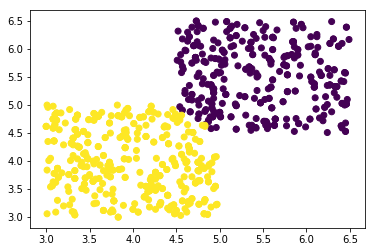

In [55]:
km = KMeans(n_clusters = 2,metric = 'chebyshev').fit(X)
kmeans = km.predict(X)
plt.scatter(X[0].values,X[1].values,c=kmeans)
plt.show()

In [58]:
X = pd.read_csv('dataset2.csv', sep ='\t',header=None)

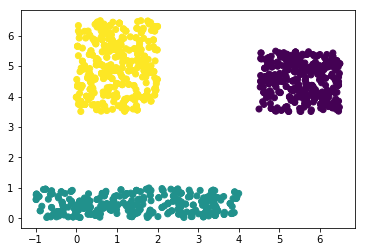

In [59]:
km = KMeans(n_clusters = 3,metric = 'chebyshev').fit(X)
kmeans = km.predict(X)
plt.scatter(X[0].values,X[1].values,c=kmeans)
plt.show()

In [60]:
X = pd.read_csv('dataset3.csv', sep ='\t',header=None)

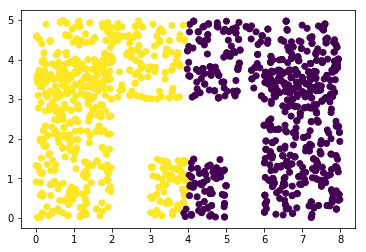

In [61]:
km = KMeans(n_clusters = 2,metric = 'chebyshev').fit(X)
kmeans = km.predict(X)
plt.scatter(X[0].values,X[1].values,c=kmeans)
plt.show()

In [33]:
import matplotlib.image as mpimg

In [93]:
image = mpimg.imread('qwerty.jpg')

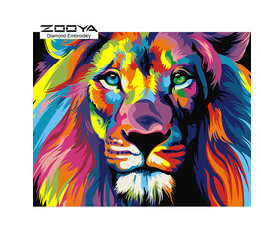

In [94]:
plt.axis("off")
plt.imshow(image)
plt.show()

In [95]:
data = image.reshape((image.shape[0]*image.shape[1],3))

In [101]:
data.shape

(48400, 3)

In [149]:
km = KMeans(n_clusters=10,eps = 0.1,max_iter = 5).fit(data)

In [150]:
proc_data = km.predict(data)

In [151]:
new_image = []
for cluster in proc_data:
    new_image.append(km.centers[cluster])

In [152]:
new_image = np.array(new_image).astype(np.uint8)

In [153]:
new_image

array([[252, 251, 249],
       [252, 251, 249],
       [252, 251, 249],
       ..., 
       [252, 251, 249],
       [252, 251, 249],
       [252, 251, 249]], dtype=uint8)

In [154]:
new_image = new_image.reshape((image.shape[0],image.shape[1],3))

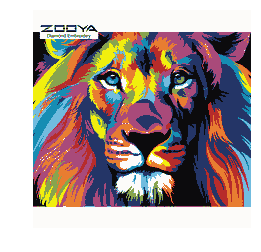

In [155]:
plt.axis("off")
plt.imshow(new_image)
plt.show()